In [13]:
import numpy as np
import pandas as pd
import cv2
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.layers import Activation, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
folder_path = "../input/brain-mri-images-for-brain-tumor-detection"
No_Tumor_Img = os.listdir(folder_path + '/no/')
Tumor_Img = os.listdir(folder_path + '/yes/')

In [15]:
Classes = {'no':0, 'yes':1}

In [16]:
X = []
y = []

for i in Classes:
    path = '../input/brain-mri-images-for-brain-tumor-detection/'+i
    for j in os.listdir(path):
        img = cv2.imread(path+'/'+j, 0)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # use the process function to crop the brain and ignore the unnecessary rest part of the image
        
        # resize image
        img = cv2.resize(img, (224,224),interpolation=cv2.INTER_CUBIC)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [17]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((253, 224, 224), (253,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
print(' length of X_train: ' + str(len(X_train)) +
      '\n length of X_test: ' + str(len(X_test)) + 
      '\n length of y_train: ' + str(len(y_train)) + 
      '\n length of y_test: ' + str(len(y_test))
     )

 length of X_train: 202
 length of X_test: 51
 length of y_train: 202
 length of y_test: 51


In [20]:
X_train = X_train.reshape(-1, 224, 224, 1)
X_test = X_test.reshape(-1, 224, 224, 1)

In [21]:
X_train.shape

(202, 224, 224, 1)

In [25]:
#input layer
Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(224, 224, 1), activation='relu')
MaxPooling2D(pool_size=(2, 2))

Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')
MaxPooling2D(pool_size=(2, 2))

Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')
MaxPooling2D(pool_size=(2, 2))

Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')
MaxPooling2D(pool_size=(2, 2))

Flatten()
Dropout(0.5)

#output layer
Dense(1, activation='sigmoid')

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

TypeError: compile() missing required argument 'source' (pos 1)

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 256)      

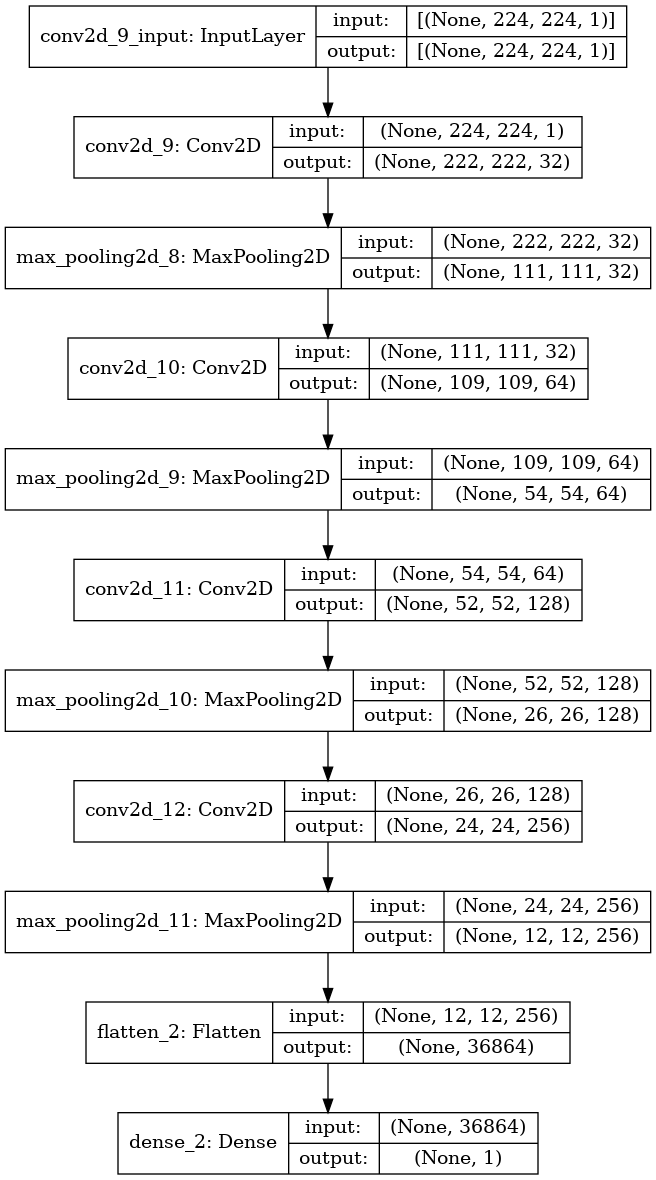

In [64]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [60]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=8)

Epoch 1/30
26/26 [==============================] - 2s 19ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.5524 - val_accuracy: 0.8431
Epoch 2/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0411 - accuracy: 0.9802 - val_loss: 1.1517 - val_accuracy: 0.8431
Epoch 3/30
26/26 [==============================] - 0s 14ms/step - loss: 0.0670 - accuracy: 0.9901 - val_loss: 0.8642 - val_accuracy: 0.8627
Epoch 4/30
26/26 [==============================] - 0s 15ms/step - loss: 0.0185 - accuracy: 0.9950 - val_loss: 0.9039 - val_accuracy: 0.8431
Epoch 5/30
26/26 [==============================] - 0s 14ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.0125 - val_accuracy: 0.8431
Epoch 6/30
26/26 [==============================] - 0s 12ms/step - loss: 3.4228e-04 - accuracy: 1.0000 - val_loss: 1.0871 - val_accuracy: 0.8431
Epoch 7/30
26/26 [==============================] - 0s 11ms/step - loss: 1.0975e-04 - accuracy: 1.0000 - val_loss: 1.1082 - val_accuracy: 0.8431
Epoch

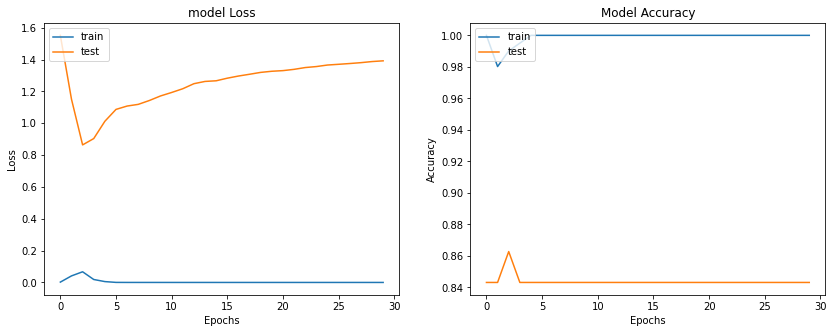

In [63]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()